In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
from scipy.interpolate import UnivariateSpline as InterpolateSpline
from scipy.interpolate import make_interp_spline as make_spline
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


config_disorder = 0
scaled_disorder = 0

if config_disorder:
    base_dir = "../results_conf_dis/"
else:
    base_dir = "../results/"

print(base_dir[2:])
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

/Users/rafal.swietek/Projects/CODES/QHamSolver/QuantumSun/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/


In [ ]:
L_total=14

J=1

alfa=1
h=1.0
w=0.5
zeta=0.2
ini_ave=1

N=3
gamma=1.0
L = L_total - N
dim = 2**L_total

alfas = np.arange(0.6, 1.0, 0.02)
sizes = np.arange(8, 16, 1)

def loop_body(alfa, L):
    
    alfa = np.round(alfa, 6)
    dim = 2**(L + N)
    
    omega_bins = np.logspace(np.log10(5/dim), 1, 300)

    _omega = []
    _spec_fun = []
    for real in range(10):
        name = base_dir + '/Correlators/realisation=%d/'%real + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', ini_ave=ini_ave)
        if exists(name):
            with h5py.File(name, "r") as file:
                E = np.array(file.get('energies'))[0]
                om = np.array(file.get('omegas'))
                # print(om.shape)
                if om.shape == (): continue

                _omega = [*_omega, *om[0]]
                _spec_fun = [*_spec_fun, *np.array(file.get('spectral_Sz_L'))[0]]
        else:
            print(name)
    _omega = np.array(_omega)
    _spec_fun = np.array(_spec_fun)
    permut = np.argsort(_omega)
    _omega = _omega[permut]
    _spec_fun = _spec_fun[permut]

    num_of_omegas = 500
    bucket_size = _omega.size / num_of_omegas
    omegas = np.zeros((num_of_omegas))
    spectral_fun = np.zeros((num_of_omegas))

    for k in range(0, num_of_omegas):
        omegas[k] = np.mean(_omega[int(k * bucket_size) : int((k+1) * bucket_size)])
        spectral_fun[k] = np.mean(_spec_fun[int(k * bucket_size) : int((k+1) * bucket_size)])
    

    omegas = np.zeros((omega_bins.size))
    spectral_fun = np.zeros((omega_bins.size))
    for k, bin in enumerate(omega_bins[:-1]):
        indices = np.where(np.logical_and(_omega >= omega_bins[k], _omega < omega_bins[k+1]))[0]
        # print(indices)
        if indices.size > 0:
            spectral_fun[k] = np.mean(_spec_fun[indices])
        

# MAKS DATA

     f_alpha=0.740  f_alpha=0.780  f_alpha=0.840  f_alpha=0.960  \
0         0.000000       0.000000       0.000000       0.000000   
1         0.000000       0.000000      19.927397       0.000000   
2        15.503634      57.440048       6.883913       1.204454   
3        11.655513      59.569726       0.336837       0.186439   
4       230.247375      97.007267      23.487821       0.040569   
..             ...            ...            ...            ...   
175       0.000000       0.000000       0.000000       0.000000   
176       0.000000       0.000000       0.000000       0.000000   
177       0.000000       0.000000       0.000000       0.000000   
178       0.000000       0.000000       0.000000       0.000000   
179       0.000000       0.000000       0.000000       0.000000   

     o_alpha=0.740  o_alpha=0.780  o_alpha=0.840  o_alpha=0.960  
0         0.000010       0.000010       0.000010       0.000010  
1         0.000011       0.000011       0.000011       0.000011

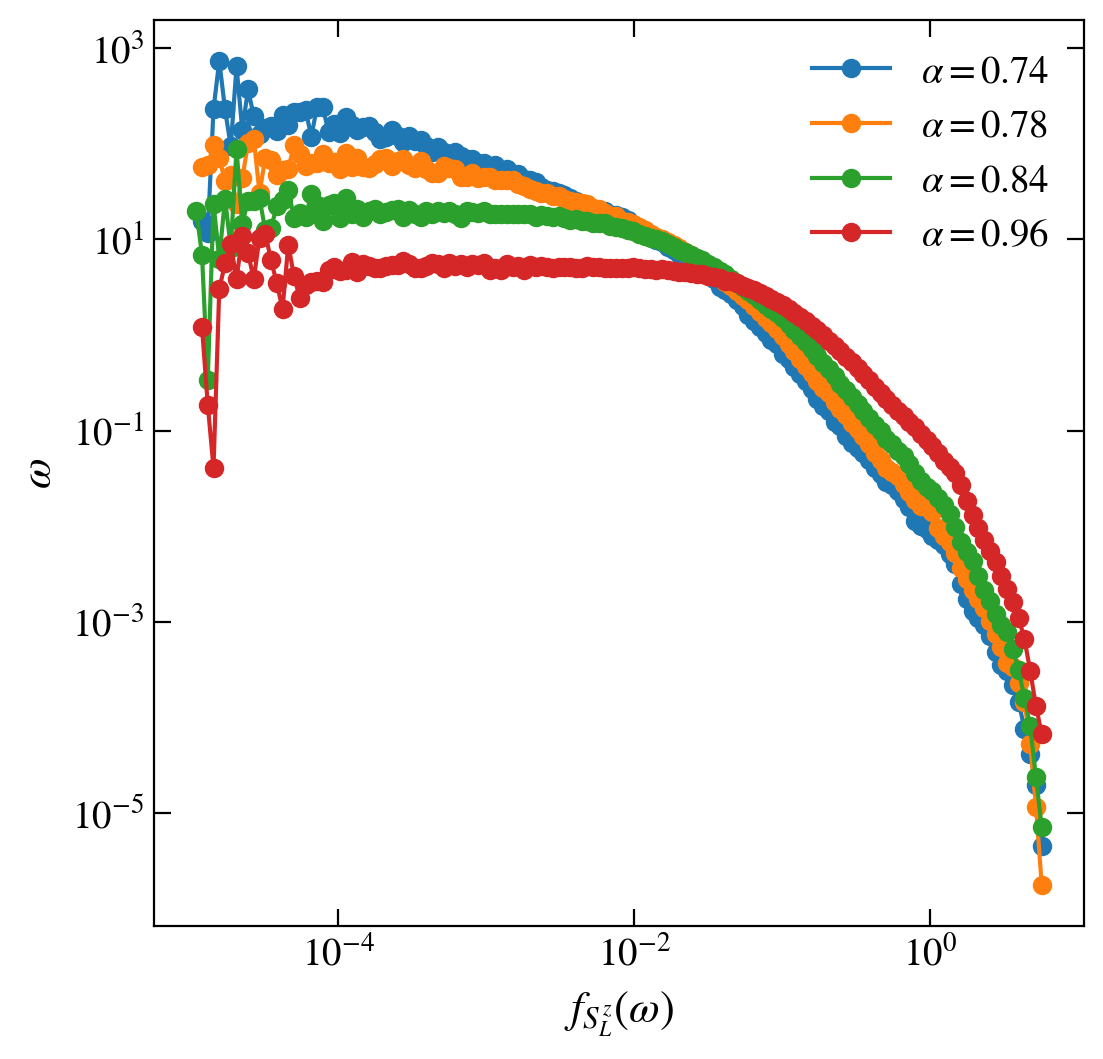

In [6]:
L_total=15

J=1

alfa=1
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N


alfas = [0.74, 0.78, 0.84, 0.96]

spins = ['L/2', 'L-1', 'L']
spin = 'L/2'

folder_options = {'L/2': 'sz_l_2', 'L-1': 'sz_lm1','L': 'sz_l'}
folder = folder_options[spin]

average = ['mean', 'typical']
_type = 'mean'

df = pd.read_csv(f"spectral_functions/f_functions/g0=%.3f/{folder}/f_fun_Ns=%d_typ={_type}.csv"%(J, L_total))
print(df)

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200)
for alfa in alfas:
    omega = df['o_alpha=%.3f'%alfa]
    spec_fun = df['f_alpha=%.3f'%alfa]
    omega = omega[spec_fun > 0]
    spec_fun = spec_fun[spec_fun > 0]

    axis.plot(omega, spec_fun, marker='o', label=r"$\alpha=%g$"%alfa)

fig_help.set_plot_elements(axis, ylabel=r"$\omega$", xlabel=r"$f_{S^z_L}(\omega)$", font_size=14, set_legend=True, xscale='log', yscale='log')

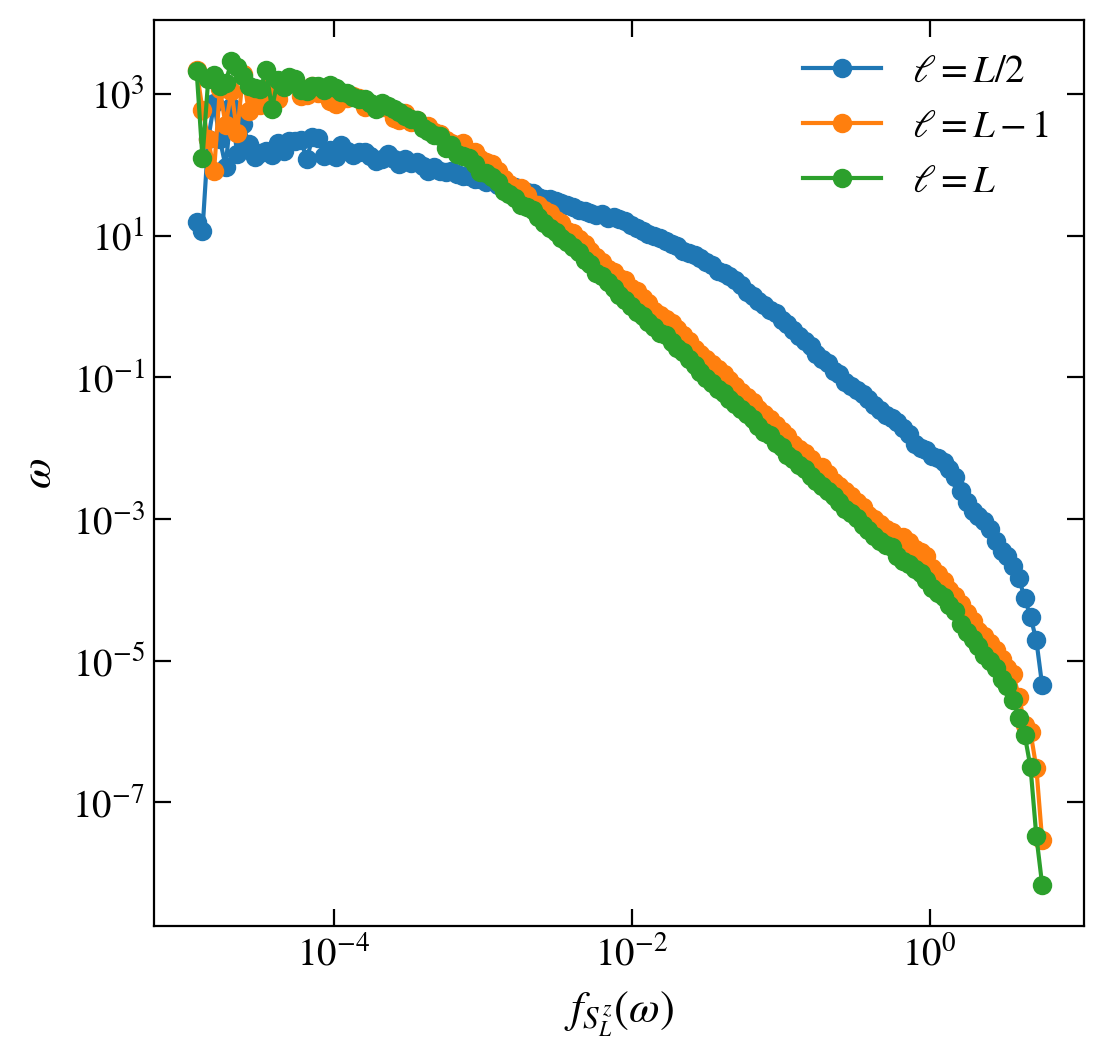

In [7]:
L_total=15

J=1

alfa=0.74
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N


alfas = [0.74, 0.78, 0.84, 0.96]

spins = ['L/2', 'L-1', 'L']
spin = 'L'


average = ['mean', 'typical']
_type = 'mean'

# print(df)

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200)
for spin in spins:
    folder_options = {'L/2': 'sz_l_2', 'L-1': 'sz_lm1','L': 'sz_l'}
    folder = folder_options[spin]
    df = pd.read_csv(f"spectral_functions/f_functions/g0=%.3f/{folder}/f_fun_Ns=%d_typ={_type}.csv"%(J, L_total))
    omega = df['o_alpha=%.3f'%alfa]
    spec_fun = df['f_alpha=%.3f'%alfa]
    omega = omega[spec_fun > 0]
    spec_fun = spec_fun[spec_fun > 0]

    axis.plot(omega, spec_fun, marker='o', label=r"$\ell=%s$"%spin)

fig_help.set_plot_elements(axis, ylabel=r"$\omega$", xlabel=r"$f_{S^z_L}(\omega)$", font_size=14, set_legend=True, xscale='log', yscale='log')

In [ ]:
L_total=15

J=1

alfa=0.74
h=1.0
w=0.5
zeta=0.2

N=3
gamma=1.0
ini_ave=0
L = L_total - N

sizes = np.arange(8, 15)
alfas = [0.74, 0.78, 0.84, 0.96]

spins = ['L/2', 'L-1', 'L']
spin = 'L'

folder_options = {'L/2': 'sz_l_2', 'L-1': 'sz_lm1','L': 'sz_l'}
folder = folder_options[spin]

average = ['mean', 'typical']
_type = 'mean'

# print(df)

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200)
for L in sizes:
    df = pd.read_csv(f"spectral_functions/f_functions/g0=%.3f/{folder}/f_fun_Ns=%d_typ={_type}.csv"%(J, L_total))
    omega = df['o_alpha=%.3f'%alfa]
    spec_fun = df['f_alpha=%.3f'%alfa]
    omega = omega[spec_fun > 0]
    spec_fun = spec_fun[spec_fun > 0]

    axis.plot(omega, spec_fun, marker='o', label=r"$\ell=%s$"%spin)

fig_help.set_plot_elements(axis, ylabel=r"$\omega$", xlabel=r"$f_{S^z_L}(\omega)$", font_size=14, set_legend=True, xscale='log', yscale='log')

# RAFAŁ

## SPECTRAL FUNCTIONS

     f_alpha=0.740  f_alpha=0.780  f_alpha=0.840  f_alpha=0.960  \
0         0.000000       0.000000       0.000000       0.000000   
1         2.758930     607.365649       0.000000       0.309869   
2         0.000000     459.940997       6.663804      11.355063   
3        43.412635       0.000000       0.000000       0.000000   
4         0.000000       0.000000       0.000000       6.402340   
..             ...            ...            ...            ...   
163       0.000000       0.000000       0.000000       0.000000   
164       0.000000       0.000000       0.000000       0.000000   
165       0.000000       0.000000       0.000000       0.000000   
166       0.000000       0.000000       0.000000       0.000000   
167       0.000000       0.000000       0.000000       0.000000   

     o_alpha=0.740  o_alpha=0.780  o_alpha=0.840  o_alpha=0.960  
0         0.000010       0.000010       0.000010       0.000010  
1         0.000011       0.000011       0.000011       0.000011

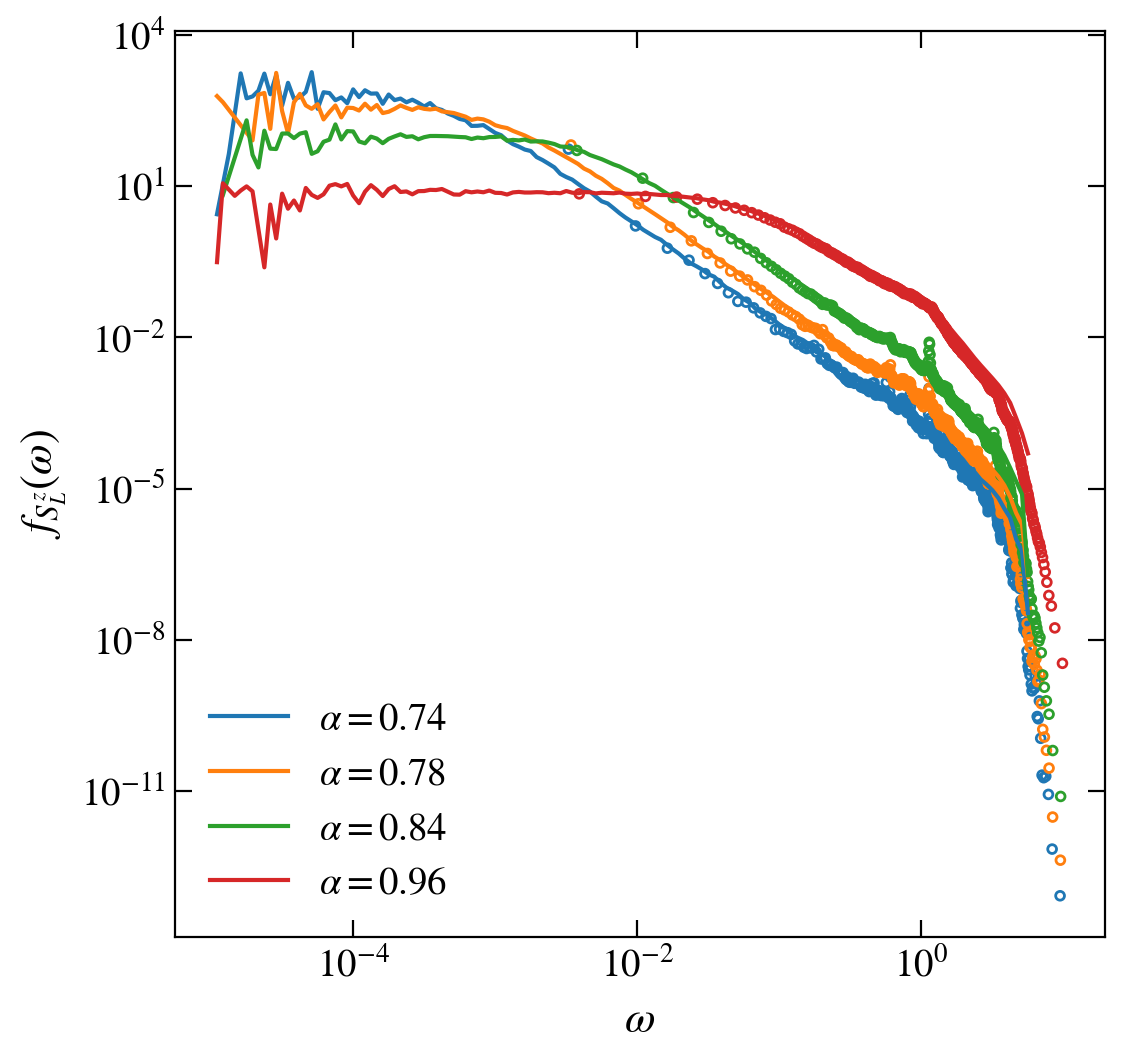

In [66]:
L_total=14

J=1

alfa=1
h=1.0
w=0.5
zeta=0.2
ini_ave=1

N=3
gamma=1.0
L = L_total - N
dim = 2**L_total

alfas = np.arange(0.6, 1.0, 0.02)

alfas = [0.74, 0.78, 0.84, 0.96]

spins = ['L/2', 'L-1', 'L']
spin = 'L'

folder_options = {'L/2': 'sz_l_2', 'L-1': 'sz_lm1','L': 'sz_l'}
folder = folder_options[spin]

average = ['mean', 'typical']
_type = 'mean'

df = pd.read_csv(f"spectral_functions/f_functions/g0=%.3f/{folder}/f_fun_Ns=%d_typ={_type}.csv"%(J, L_total))
print(df)

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200)
for alfa in alfas:
    _omega = []
    _spec_fun = []
    for real in range(10):
        name = '/Users/rafal.swietek/SCP/DOWNLOAD/realisation=%d/'%real + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', ini_ave=ini_ave)
        if exists(name):
            with h5py.File(name, "r") as file:
                E = np.array(file.get('energies'))[0]
                om = np.array(file.get('omegas'))
                # print(om.shape)
                if om.shape == (): continue

                _omega = [*_omega, *om[0]]
                _spec_fun = [*_spec_fun, *np.array(file.get('spectral_Sz_L'))[0]]
        else:
            print(name)
    _omega = np.array(_omega)
    _spec_fun = np.array(_spec_fun)
    permut = np.argsort(_omega)
    _omega = _omega[permut]
    _spec_fun = _spec_fun[permut]


    omega = df['o_alpha=%.3f'%alfa]
    spec_fun = df['f_alpha=%.3f'%alfa]
    omega = omega[spec_fun > 0]
    spec_fun = spec_fun[spec_fun > 0]

    pl =  axis.plot(omega, spec_fun, marker='o', label=r"$\alpha=%g$"%alfa, markersize=0)

    num_of_omegas = 500
    bucket_size = _omega.size / num_of_omegas
    omegas = np.zeros((num_of_omegas))
    spectral_fun = np.zeros((num_of_omegas))

    for k in range(0, num_of_omegas):
        omegas[k] = np.mean(_omega[int(k * bucket_size) : int((k+1) * bucket_size)])
        spectral_fun[k] = np.mean(_spec_fun[int(k * bucket_size) : int((k+1) * bucket_size)])
    
    axis.scatter(omegas, dim * spectral_fun, marker='o', s=10, color=pl[0].get_color(), facecolor='None')
    

fig_help.set_plot_elements(axis, xlabel=r"$\omega$", ylabel=r"$f_{S^z_L}(\omega)$", font_size=14, set_legend=True, xscale='log', yscale='log')

/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=2/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=3/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=4/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=5/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=6/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=7/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.7,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swiete

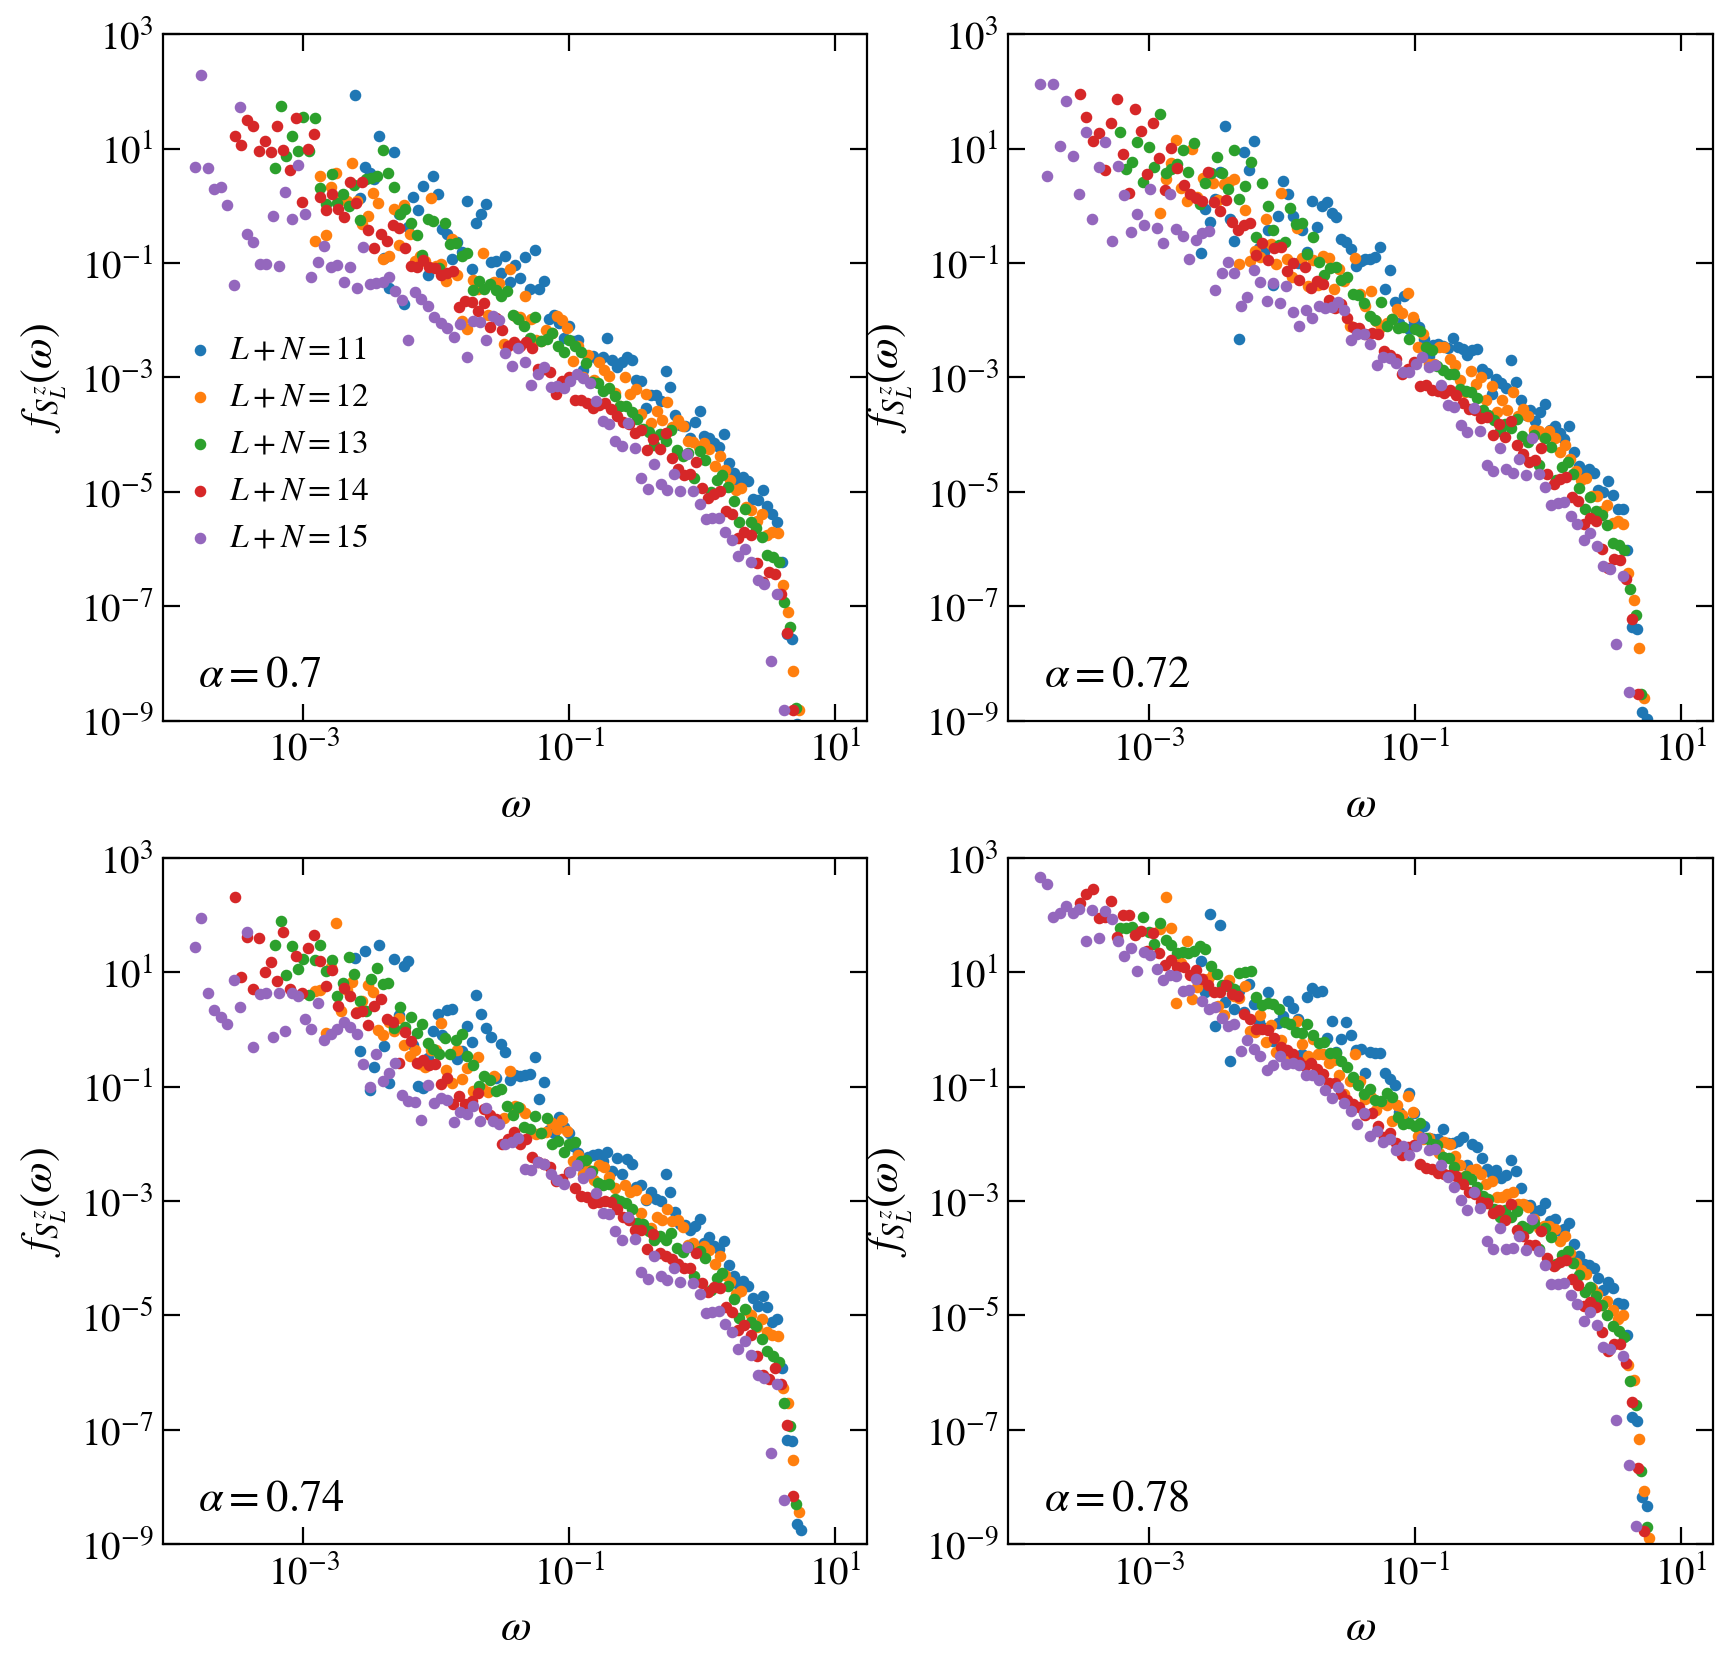

In [75]:
L_total=14

J=0.5

h=1.0
w=0.5
zeta=0.2
ini_ave=1

N=3
gamma=1.0
L = L_total - N
dim = 2**L_total

alfas = np.arange(0.6, 1.0, 0.02)

alfas = [0.7, 0.72, 0.74, 0.78]
sizes = np.arange(11, 16, 1)

spins = ['L/2', 'L-1', 'L']
spin = 'L'

average = ['mean', 'typical']
_type = 'mean'


fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 200)
axes = axes.flatten()

for ii_ax, axis in enumerate(axes):
    alfa = alfas[ii_ax]
    for L_total in sizes:
        L = L_total - N
        dim = 2**L_total
        
        omega_bins = np.logspace(np.log10(5/dim), 1, 100)

        _omega = []
        _spec_fun = []
        for real in range(10):
            name = '/Users/rafal.swietek/SCP/DOWNLOAD/realisation=%d/'%real + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', ini_ave=ini_ave)
            if exists(name):
                with h5py.File(name, "r") as file:
                    E = np.array(file.get('energies'))[0]
                    om = np.array(file.get('omegas'))
                    # print(om.shape)
                    if om.shape == (): continue

                    _omega = [*_omega, *om[0]]
                    _spec_fun = [*_spec_fun, *np.array(file.get('spectral_Sz_L'))[0]]
            else:
                print(name)
        _omega = np.array(_omega)
        _spec_fun = np.array(_spec_fun)
        permut = np.argsort(_omega)
        _omega = _omega[permut]
        _spec_fun = _spec_fun[permut]

        # num_of_omegas = 500
        # bucket_size = _omega.size / num_of_omegas
        # omegas = np.zeros((num_of_omegas))
        # spectral_fun = np.zeros((num_of_omegas))

        # for k in range(0, num_of_omegas):
        #     omegas[k] = np.mean(_omega[int(k * bucket_size) : int((k+1) * bucket_size)])
        #     spectral_fun[k] = np.mean(_spec_fun[int(k * bucket_size) : int((k+1) * bucket_size)])
        
        # axis.scatter(omegas, dim * spectral_fun, marker='o', s=10)

        omegas = np.zeros((omega_bins.size))
        spectral_fun = np.zeros((omega_bins.size))
        for k, bin in enumerate(omega_bins[:-1]):
            indices = np.where(np.logical_and(_omega >= omega_bins[k], _omega < omega_bins[k+1]))[0]
            # print(indices)
            if indices.size > 0:
                spectral_fun[k] = np.mean(_spec_fun[indices])
            
        axis.scatter(omega_bins, dim * spectral_fun, marker='o', s=10, label=r"$L+N=%d$"%L_total)

    axis.annotate(r"$\alpha=%g$"%alfa, fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    fig_help.set_plot_elements(axis, xlabel=r"$\omega$", ylabel=r"$f_{S^z_L}(\omega)$", font_size=14, set_legend=False, xscale='log', yscale='log', ylim=(1e-9, 1e3))

fig_help.set_legend(axes[0], loc = 'lower left', fontsize=12, anchor=(-0.02, 0.2))

/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=2/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=3/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=4/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=5/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=6/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=7/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swiete

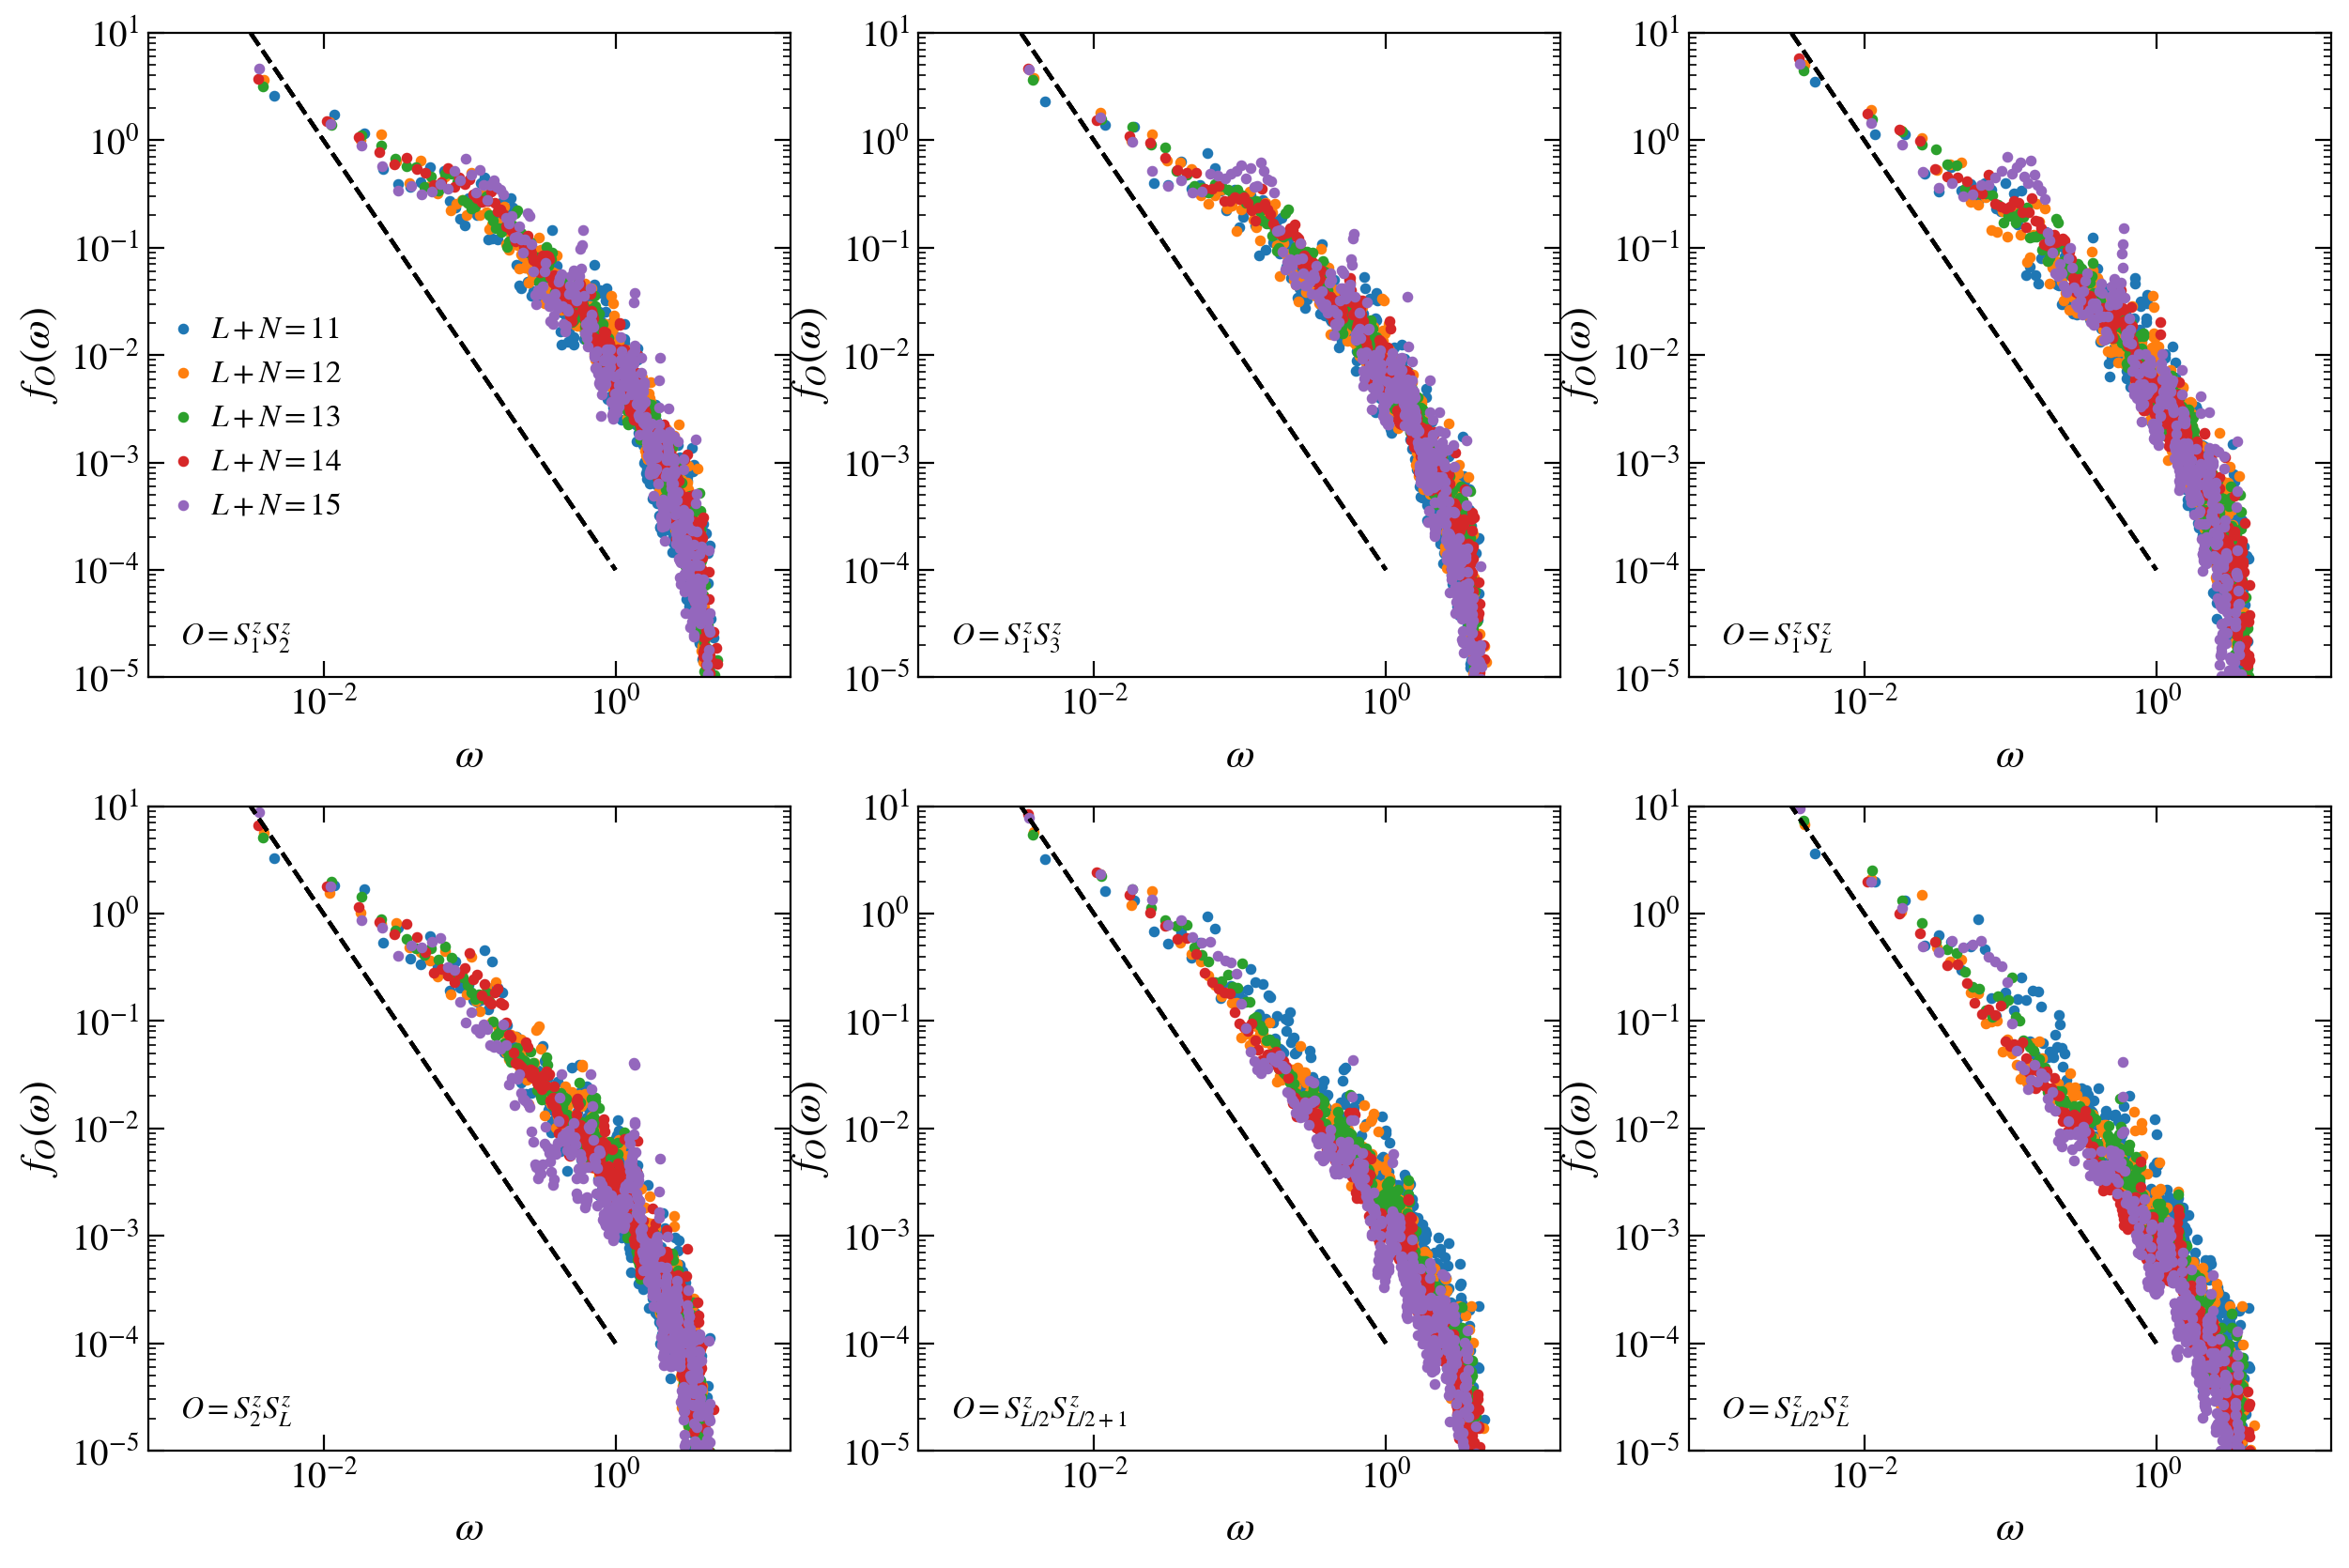

In [64]:
L_total=14

J=0.5

alfa=0.8
h=1.0
w=0.5
zeta=0.2
ini_ave=1

N=3
gamma=1.0
L = L_total - N

# std::vector<std::pair<int,int>> site_pairs = std::vector<std::pair<int,int>>(
			# {std::make_pair(this->grain_size, this->grain_size + 1), std::make_pair(this->grain_size, this->grain_size + 2),
			# std::make_pair(this->grain_size, this->L - 1), std::make_pair(this->grain_size + 1, this->L - 1),
			# std::make_pair(Lhalf, Lhalf + 1), std::make_pair(Lhalf, this->L - 1)}
			# );
alfas = np.arange(0.6, 1.0, 0.02)
sizes = np.arange(11, 16, 1)

spin_pairs = ['1:2', '1:3', '1:L', '2:L', 'L/2:L/2+1', 'L/2:L']
spin_pair = 'L'

def operator_name(spin_pair):
    ells = spin_pair.split(':')
    return r"$S^z_{%s}S^z_{%s}$"%(ells[0], ells[1])

average = ['mean', 'typical']
_type = 'mean'


fig, axis = plt.subplots( nrows=2, ncols=3, figsize=(15,10), dpi = 200)
axis = axis.flatten()

for ii, spin_pair in enumerate(spin_pairs):
    for L_total in sizes:
        L = L_total - N
        dim = 2**L_total
        omega_bins = np.logspace(np.log10(1/dim), 1, 100)
        # print(L_total, omega_bins)
        _omega = []
        _spec_fun = []
        for real in range(10):
            name = '/Users/rafal.swietek/SCP/DOWNLOAD/realisation=%d/'%real + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', ini_ave=ini_ave)
            if exists(name):
                with h5py.File(name, "r") as file:
                    E = np.array(file.get('energies'))[0]
                    om = np.array(file.get('omegas'))
                    # print(om.shape)
                    if om.shape == (): continue

                    _omega = [*_omega, *om[0]]
                    _spec_fun = [*_spec_fun, *np.array(file.get('spectral_funs'))[ii]]
            else:
                print(name)

        _omega = np.array(_omega)
        _spec_fun = np.array(_spec_fun)
        permut = np.argsort(_omega)
        _omega = _omega[permut]
        _spec_fun = _spec_fun[permut]


        num_of_omegas = 500
        bucket_size = _omega.size / num_of_omegas
        omegas = np.zeros((num_of_omegas))
        spectral_fun = np.zeros((num_of_omegas))

        for k in range(0, num_of_omegas):
            omegas[k] = np.mean(_omega[int(k * bucket_size) : int((k+1) * bucket_size)])
            spectral_fun[k] = np.mean(_spec_fun[int(k * bucket_size) : int((k+1) * bucket_size)])
        axis[ii].scatter(omegas, dim * spectral_fun, marker='o', s=10, label=r"$L+N=%d$"%L_total)

        # omegas = np.zeros((omega_bins.size))
        # spectral_fun = np.zeros((omega_bins.size))
        # for k, bin in enumerate(omega_bins[:-1]):
        #     indices = np.where(np.logical_and(_omega >= omega_bins[k], _omega < omega_bins[k+1]))[0]
        #     # print(indices)
        #     if indices.size > 0:
        #         spectral_fun[k] = np.mean(_spec_fun[indices])
            
        # axis[ii].scatter(omega_bins, dim * spectral_fun, marker='o', s=10, label=r"$L+N=%d$"%L_total)

        om = np.logspace(-3, 0, 100)
        axis[ii].plot(om, 1/(100*om)**2, ls='--', c='k')
    axis[ii].annotate(r"$O=$"+operator_name(spin_pair), fontsize=12, xy=(0.05, 0.05), xycoords='axes fraction')
    fig_help.set_plot_elements(axis[ii], xlabel=r"$\omega$", ylabel=r"$f_{O}(\omega)$", font_size=14, set_legend=False, xscale='log', yscale='log', ylim=(1e-5, 1e1))

fig_help.set_legend(axis[0], loc = 'lower left', fontsize=12, anchor=(-0.02, 0.2))

## TIME EVOLUTION

/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swiete

No handles with labels found to put in legend.


/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5


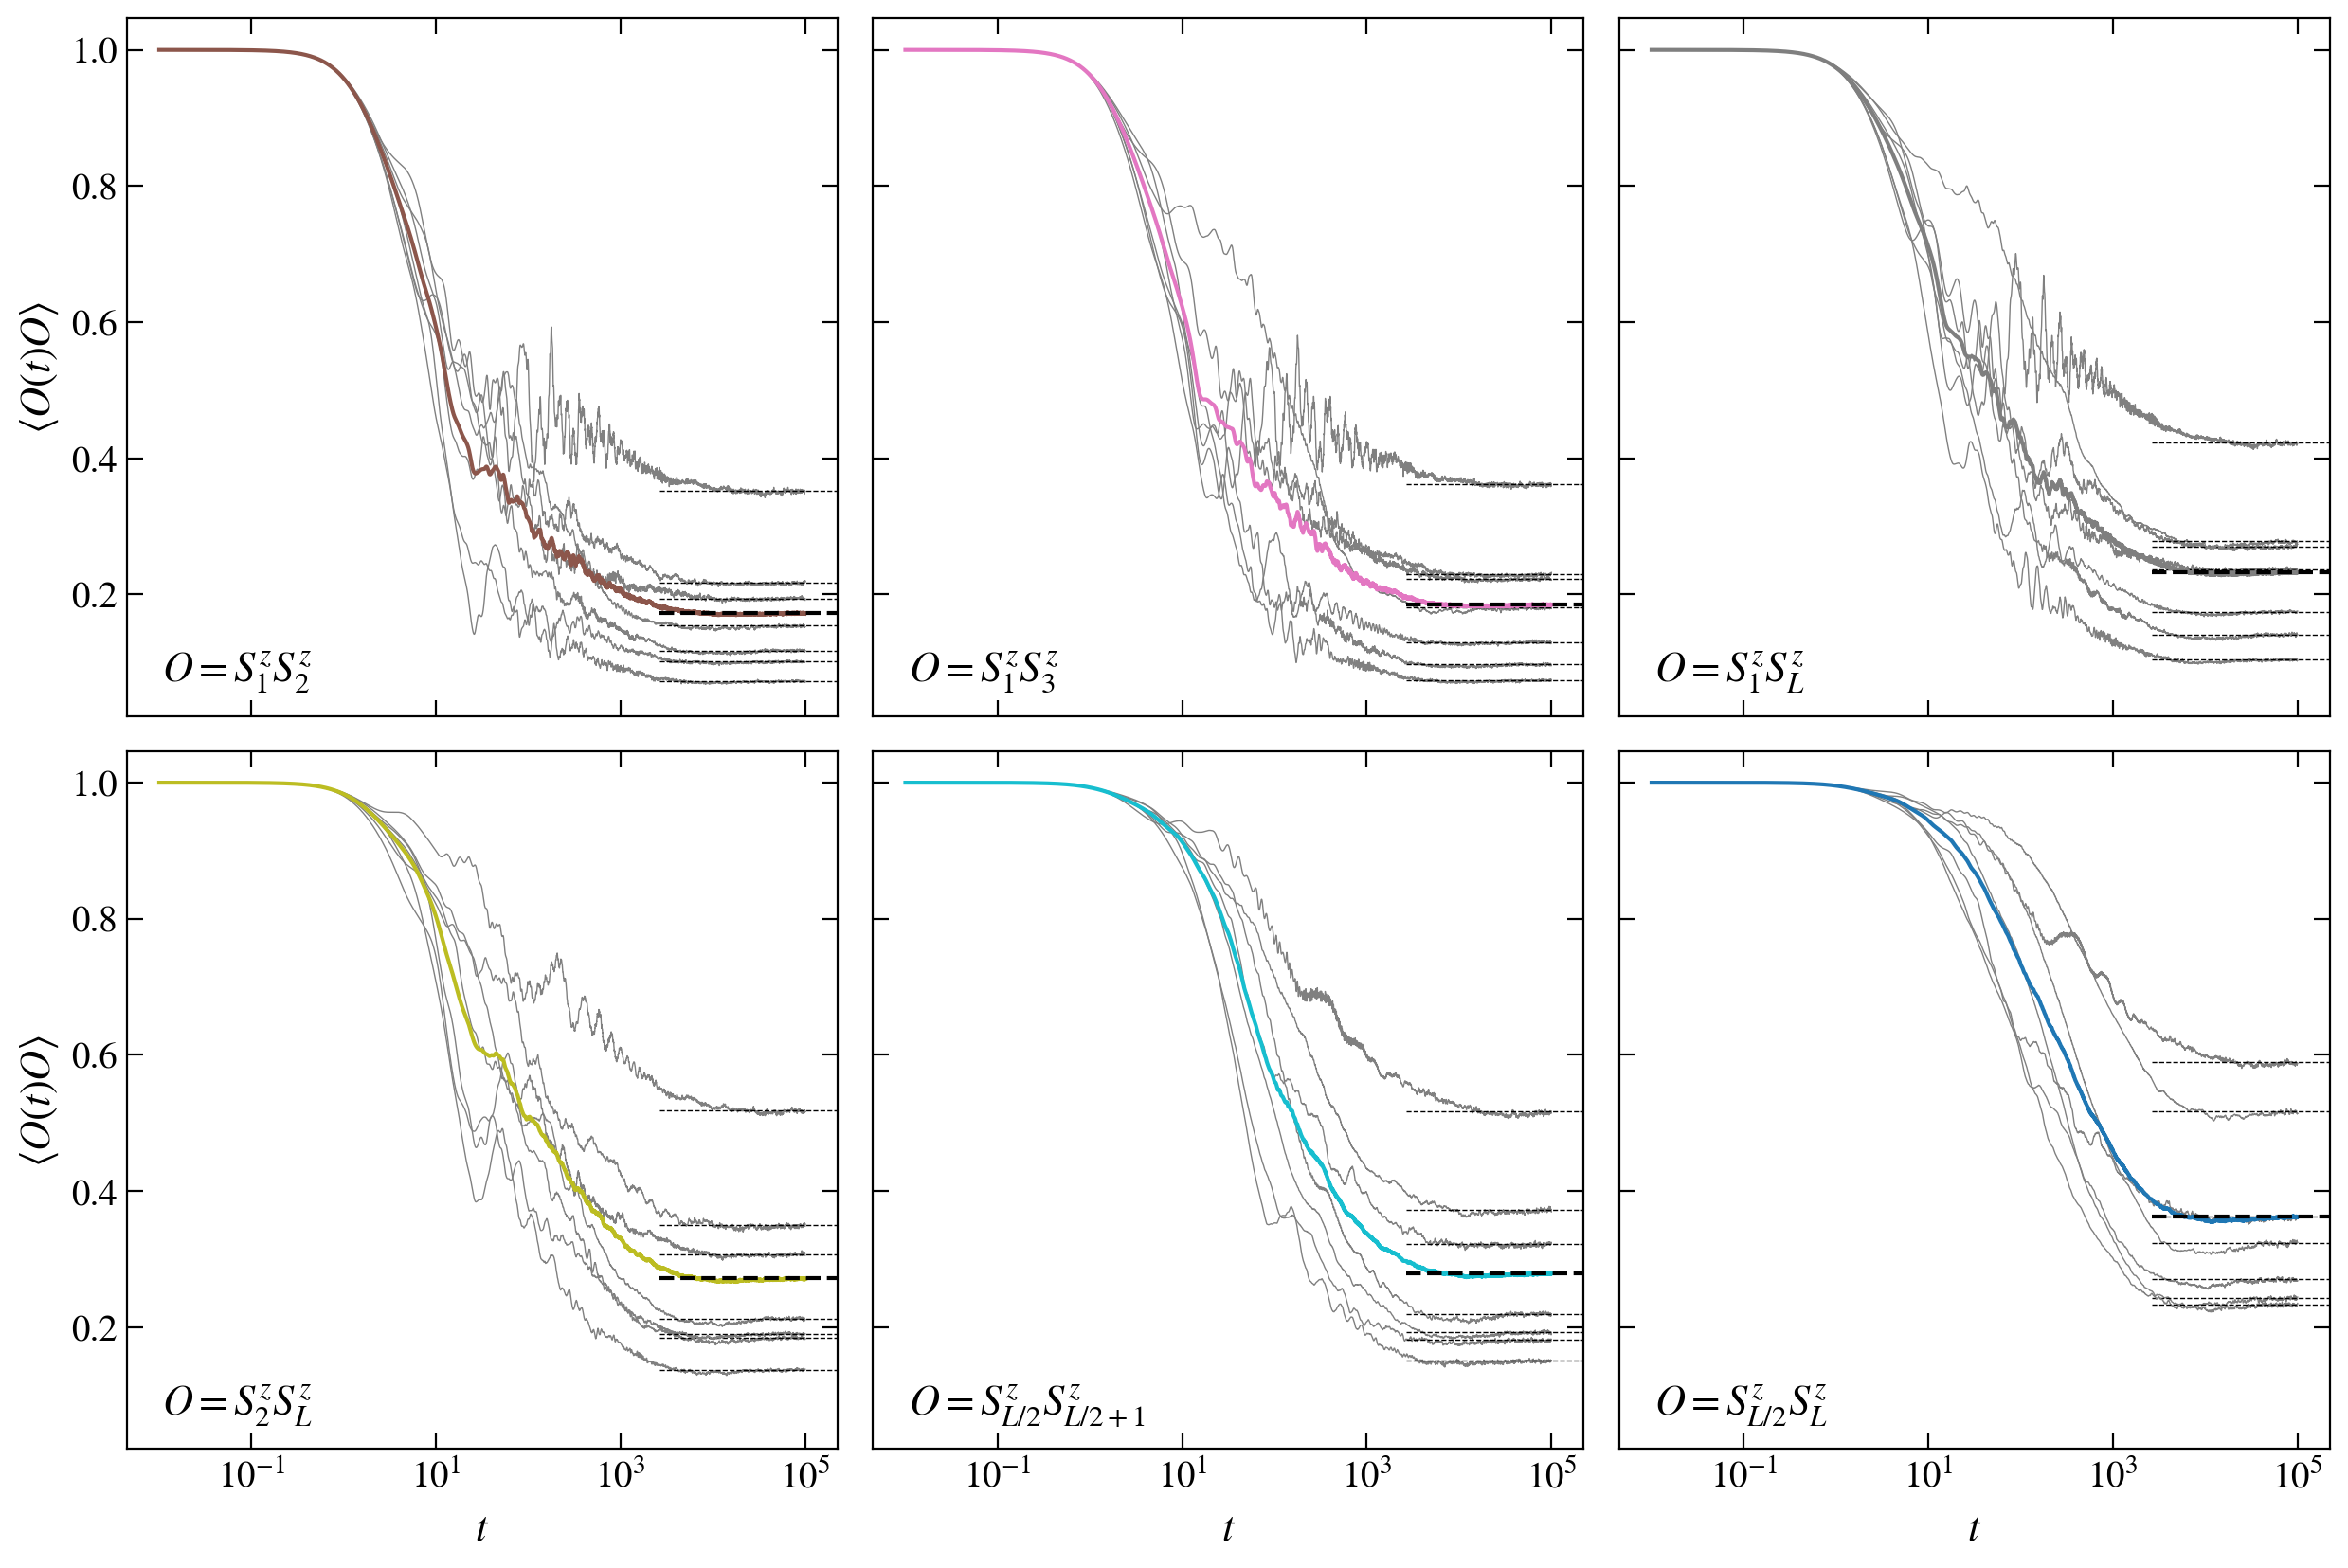

In [116]:
L_total=14

J=0.5

alfa=0.8
h=1.0
w=0.5
zeta=0.2
ini_ave=1

N=3
gamma=1.0
L = L_total - N

# std::vector<std::pair<int,int>> site_pairs = std::vector<std::pair<int,int>>(
			# {std::make_pair(this->grain_size, this->grain_size + 1), std::make_pair(this->grain_size, this->grain_size + 2),
			# std::make_pair(this->grain_size, this->L - 1), std::make_pair(this->grain_size + 1, this->L - 1),
			# std::make_pair(Lhalf, Lhalf + 1), std::make_pair(Lhalf, this->L - 1)}
			# );
alfas = np.arange(0.6, 1.0, 0.02)
sizes = np.arange(11, 16, 1)

spin_pairs = ['1:2', '1:3', '1:L', '2:L', 'L/2:L/2+1', 'L/2:L']
spin_pair = 'L'

def operator_name(spin_pair):
    ells = spin_pair.split(':')
    return r"$S^z_{%s}S^z_{%s}$"%(ells[0], ells[1])

average = ['mean', 'typical']
_type = 'mean'


fig, axis = plt.subplots( nrows=2, ncols=3, figsize=(15,10), dpi = 200, sharey=True, sharex=True)
axis = axis.flatten()

for ii, spin_pair in enumerate(spin_pairs):
    col = next(colors_ls_cyc)

    L = L_total - N
    dim = 2**L_total
    omega_bins = np.logspace(np.log10(1/dim), 1, 100)
    # print(L_total, omega_bins)
    times_a = np.zeros((5000))
    autocorr = np.zeros((5000))
    LTA = 0
    counter = 0
    for real in range(10):
        name = '/Users/rafal.swietek/SCP/DOWNLOAD/realisation=%d/'%real + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', ini_ave=ini_ave)
        if exists(name):
            with h5py.File(name, "r") as file:
                E = np.array(file.get('energies'))[0]
                times = np.array(file.get('times'))
                # print(om.shape)
                if times.shape == (): continue
                
                times = times[0]
                autocorr_r = 16 * np.array(file.get('autocorr'))[ii]
                
                autocorr += autocorr_r
                counter += 1

                axis[ii].plot(times, autocorr_r, color='gray', lw=0.5)
                LTA_r = 16 * np.array(file.get('LTA'))[0][ii]
                # print(LTA_r)
                LTA += LTA_r
                axis[ii].axhline(y=LTA_r, xmin=0.75, xmax=1, ls='--', c='k', lw=0.5)
                times_a += times

        else:
            print(name)
    times_a /= counter
    autocorr /= counter
    LTA /= counter

    # print(times.shape, autocorr.shape)
    axis[ii].plot(times_a, autocorr, color=col, lw=1.5)
    axis[ii].axhline(y=LTA, xmin=0.75, xmax=1, ls='--', c='k')

    axis[ii].annotate(r"$O=$"+operator_name(spin_pair), fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    fig_help.set_plot_elements(axis[ii], xlabel=r"$t$" if ii > 2 else "", ylabel=r"$\langle O(t)O\rangle$" if ii % 3 == 0 else "", font_size=14, set_legend=False, xscale='log', yscale='linear')

fig_help.set_legend(axis[0], loc = 'lower left', fontsize=12, anchor=(-0.02, 0.2))
fig.subplots_adjust(wspace = 0.05, hspace=0.05)

/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=2/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=3/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=4/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=5/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=6/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=7/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swiete

No handles with labels found to put in legend.


/Users/rafal.swietek/SCP/DOWNLOAD/realisation=2/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=3/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=4/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=5/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=6/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=7/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5


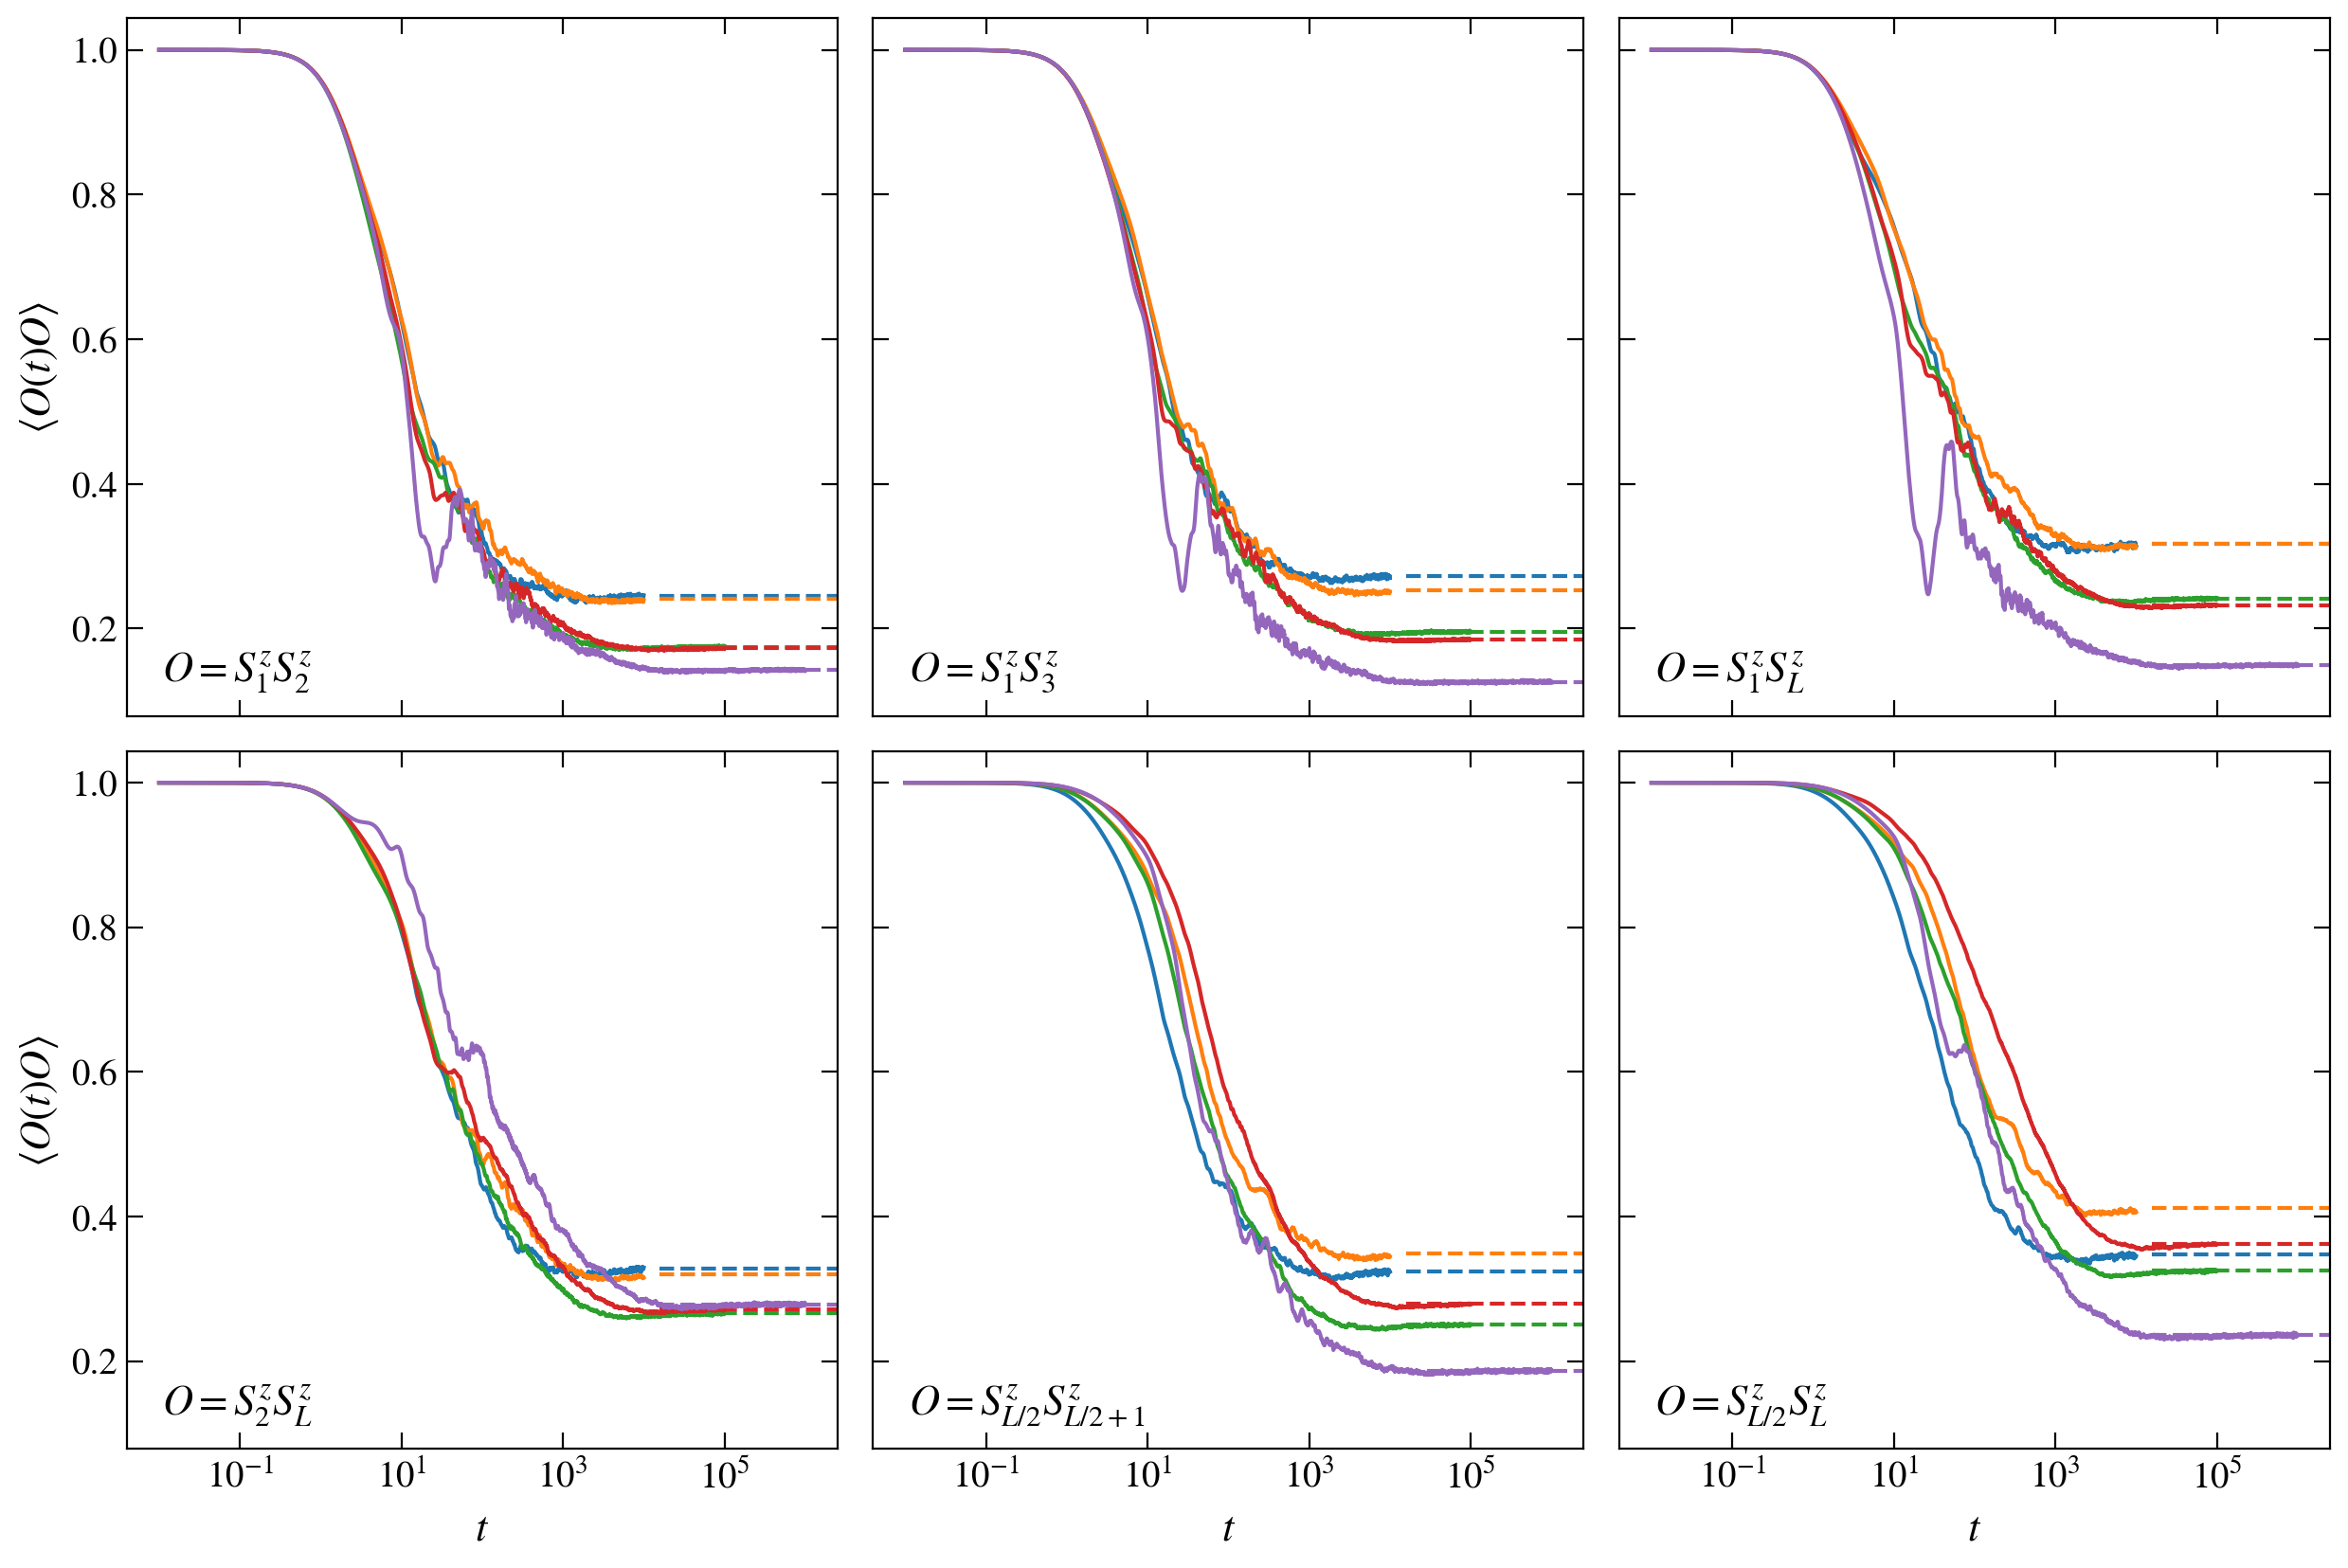

In [119]:
L_total=14

J=0.5

alfa=0.8
h=1.0
w=0.5
zeta=0.2
ini_ave=1

N=3
gamma=1.0
L = L_total - N

# std::vector<std::pair<int,int>> site_pairs = std::vector<std::pair<int,int>>(
			# {std::make_pair(this->grain_size, this->grain_size + 1), std::make_pair(this->grain_size, this->grain_size + 2),
			# std::make_pair(this->grain_size, this->L - 1), std::make_pair(this->grain_size + 1, this->L - 1),
			# std::make_pair(Lhalf, Lhalf + 1), std::make_pair(Lhalf, this->L - 1)}
			# );
alfas = np.arange(0.6, 1.0, 0.02)
sizes = np.arange(11, 16, 1)

spin_pairs = ['1:2', '1:3', '1:L', '2:L', 'L/2:L/2+1', 'L/2:L']
spin_pair = 'L'

def operator_name(spin_pair):
    ells = spin_pair.split(':')
    return r"$S^z_{%s}S^z_{%s}$"%(ells[0], ells[1])

average = ['mean', 'typical']
_type = 'mean'


fig, axis = plt.subplots( nrows=2, ncols=3, figsize=(15,10), dpi = 200, sharey=True, sharex=True)
axis = axis.flatten()

for ii, spin_pair in enumerate(spin_pairs):
    colors_ls_cyc = itertools.cycle(colors_ls)
    markers = itertools.cycle(markers_ls)
    for L_total in sizes:
        col = next(colors_ls_cyc)

        L = L_total - N
        dim = 2**L_total
        omega_bins = np.logspace(np.log10(1/dim), 1, 100)
        # print(L_total, omega_bins)
        times_a = np.zeros((5000))
        autocorr = np.zeros((5000))
        LTA = 0
        counter = 0
        for real in range(10):
            name = '/Users/rafal.swietek/SCP/DOWNLOAD/realisation=%d/'%real + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', ini_ave=ini_ave)
            if exists(name):
                with h5py.File(name, "r") as file:
                    E = np.array(file.get('energies'))[0]
                    times = np.array(file.get('times'))
                    # print(om.shape)
                    if times.shape == (): continue
                    
                    times = times[0]
                    autocorr_r = 16 * np.array(file.get('autocorr'))[ii]
                    
                    autocorr += autocorr_r
                    counter += 1

                    # axis[ii].plot(times, autocorr_r, color='gray', lw=0.5)
                    LTA_r = 16 * np.array(file.get('LTA'))[0][ii]
                    # print(LTA_r)
                    LTA += LTA_r
                    # axis[ii].axhline(y=LTA_r, xmin=0.75, xmax=1, ls='--', c='k', lw=0.5)
                    times_a += times

            else:
                print(name)
        times_a /= counter
        autocorr /= counter
        LTA /= counter

        # print(times.shape, autocorr.shape)
        axis[ii].plot(times_a, autocorr, color=col, lw=1.5)
        axis[ii].axhline(y=LTA, xmin=0.75, xmax=1, ls='--', c=col)

    axis[ii].annotate(r"$O=$"+operator_name(spin_pair), fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    fig_help.set_plot_elements(axis[ii], xlabel=r"$t$" if ii > 2 else "", ylabel=r"$\langle O(t)O\rangle$" if ii % 3 == 0 else "", font_size=14, set_legend=False, xscale='log', yscale='linear')

fig_help.set_legend(axis[0], loc = 'lower left', fontsize=12, anchor=(-0.02, 0.2))
fig.subplots_adjust(wspace = 0.05, hspace=0.05)

No handles with labels found to put in legend.


/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swiete

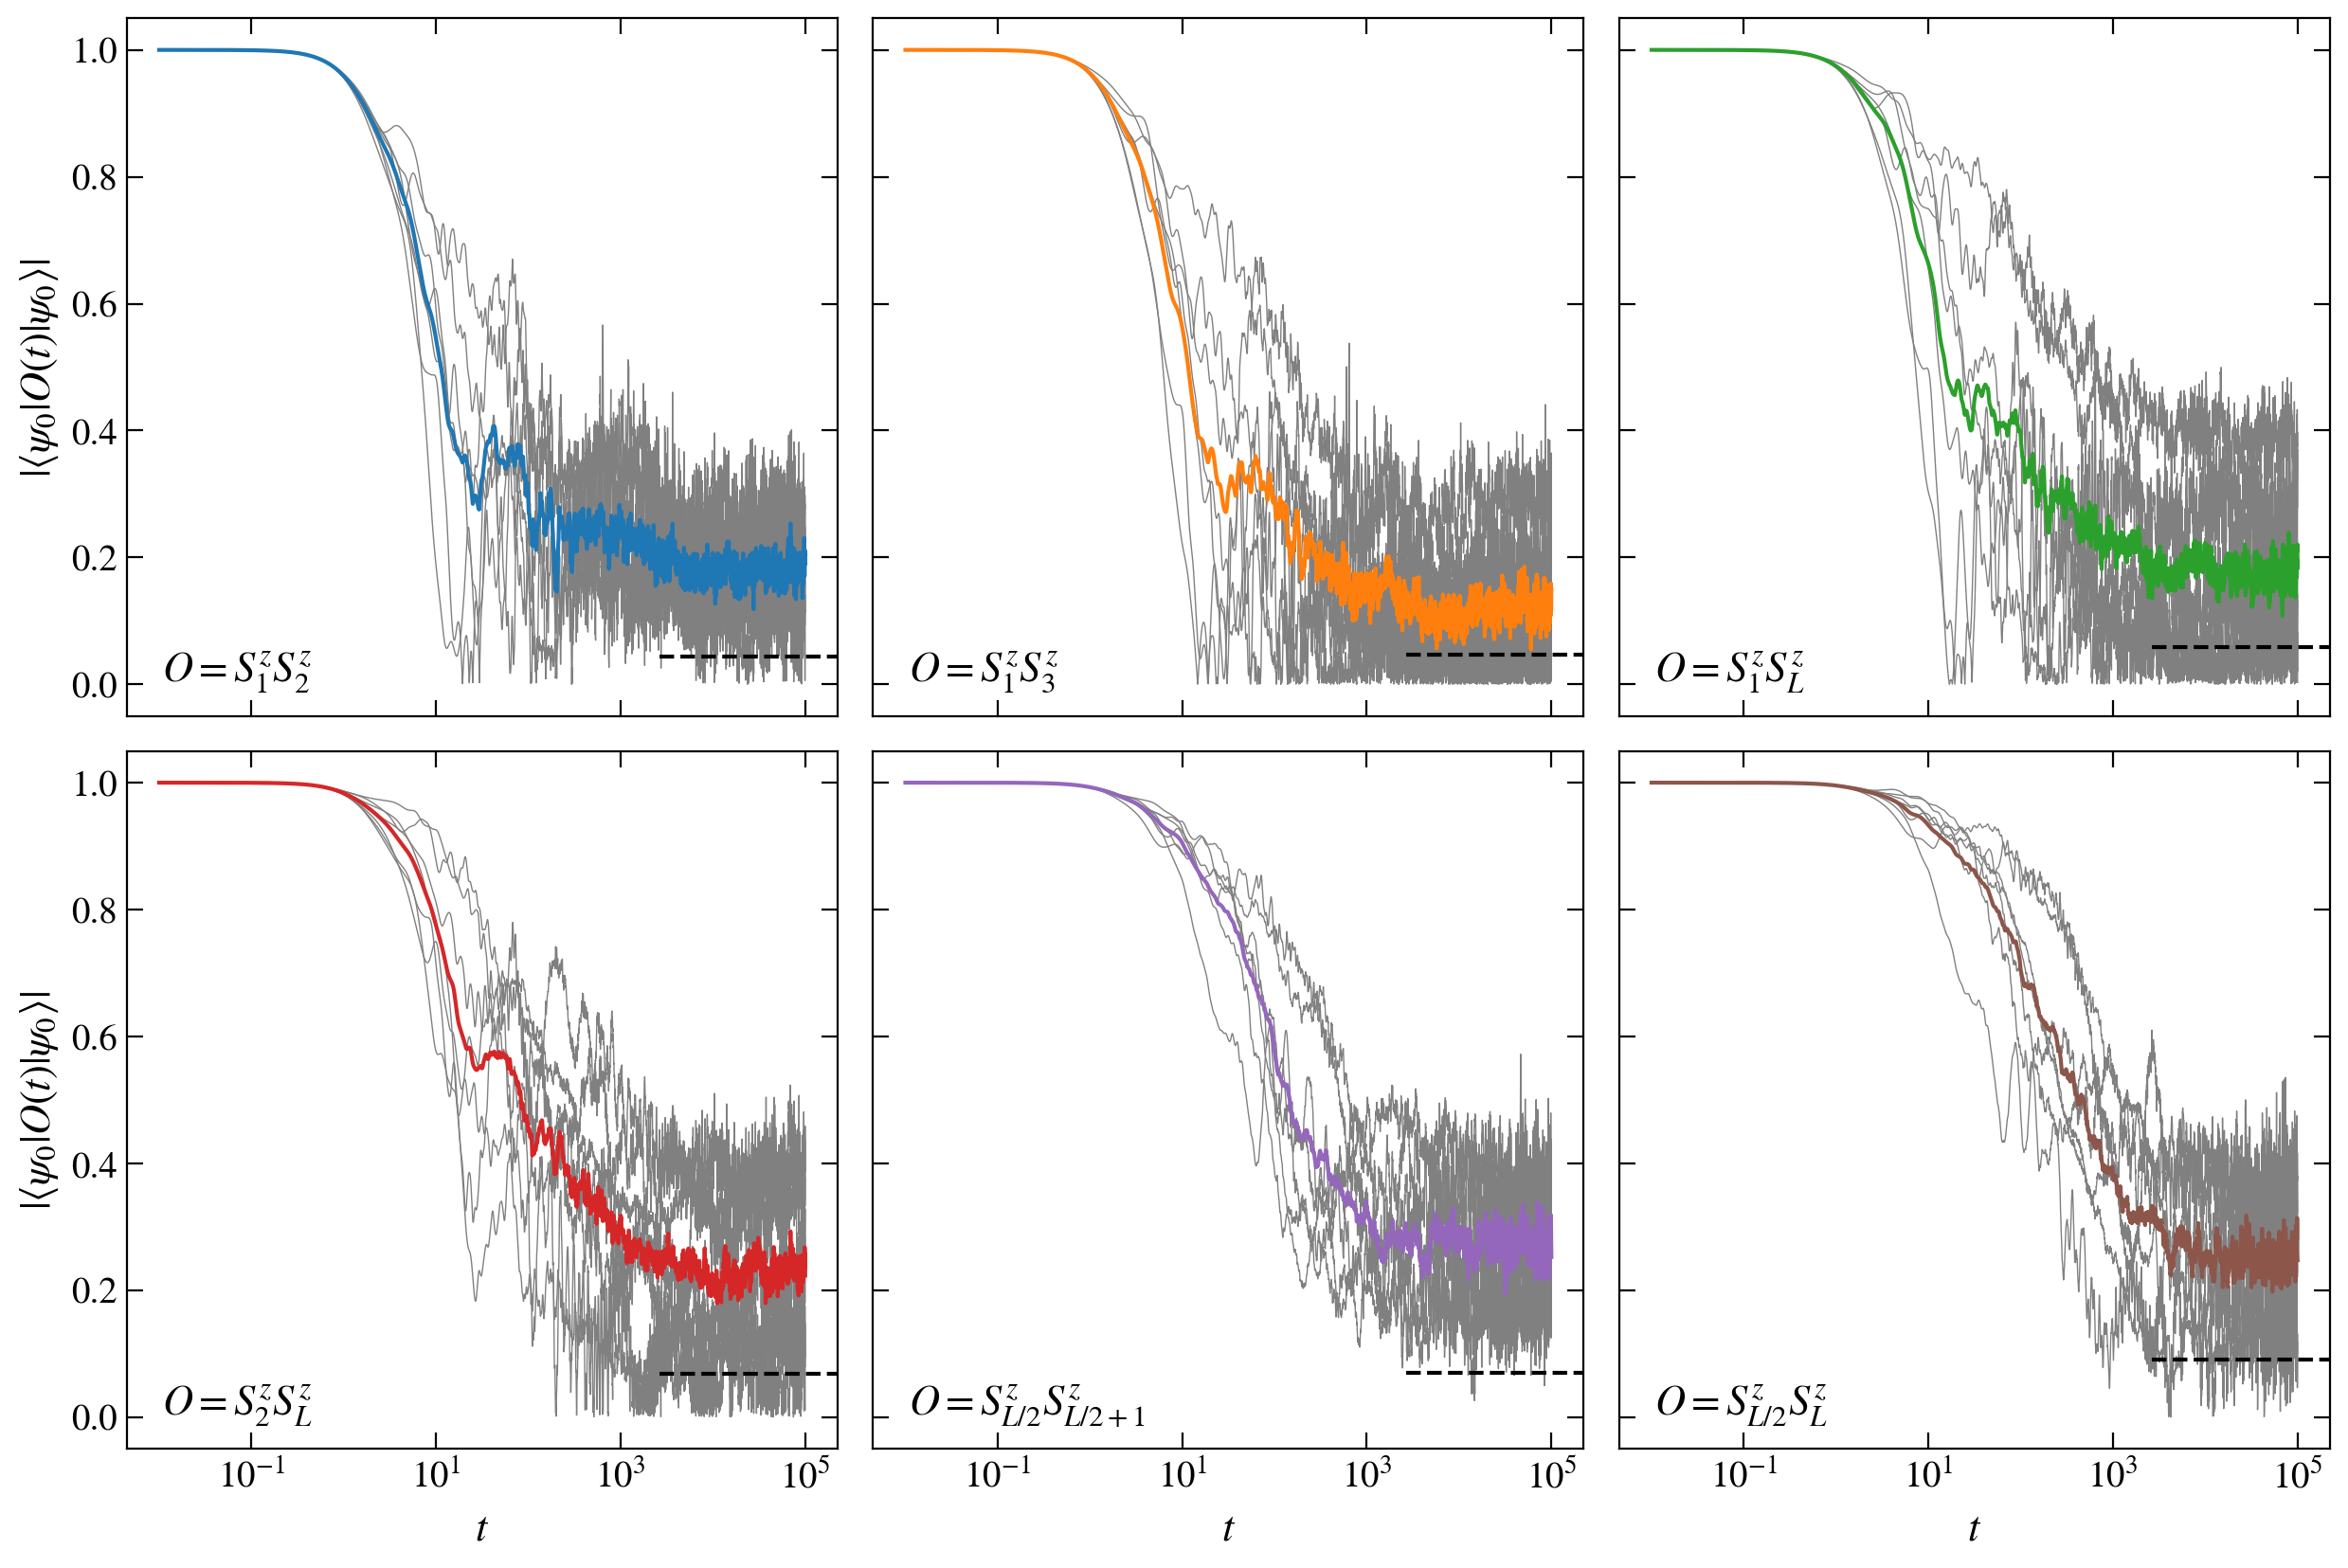

In [114]:

colors_ls_cyc = itertools.cycle(colors_ls)
markers = itertools.cycle(markers_ls)

L_total=14

J=0.5

alfa=0.8
h=1.0
w=0.5
zeta=0.2
ini_ave=1

N=3
gamma=1.0
L = L_total - N

# std::vector<std::pair<int,int>> site_pairs = std::vector<std::pair<int,int>>(
			# {std::make_pair(this->grain_size, this->grain_size + 1), std::make_pair(this->grain_size, this->grain_size + 2),
			# std::make_pair(this->grain_size, this->L - 1), std::make_pair(this->grain_size + 1, this->L - 1),
			# std::make_pair(Lhalf, Lhalf + 1), std::make_pair(Lhalf, this->L - 1)}
			# );
alfas = np.arange(0.6, 1.0, 0.02)
sizes = np.arange(11, 16, 1)

spin_pairs = ['1:2', '1:3', '1:L', '2:L', 'L/2:L/2+1', 'L/2:L']
spin_pair = 'L'

def operator_name(spin_pair):
    ells = spin_pair.split(':')
    return r"$S^z_{%s}S^z_{%s}$"%(ells[0], ells[1])

quench_types = ['FM', 'AFM', 'spiral', 'random']
quench = 'AFM'


fig, axis = plt.subplots( nrows=2, ncols=3, figsize=(15,10), dpi = 200, sharey=True, sharex=True)
axis = axis.flatten()

for ii, spin_pair in enumerate(spin_pairs):
    col = next(colors_ls_cyc)

    L = L_total - N
    dim = 2**L_total
    omega_bins = np.logspace(np.log10(1/dim), 1, 100)
    # print(L_total, omega_bins)
    times_a = np.zeros((5000))
    autocorr = np.zeros((5000))
    LTA = 0
    counter = 0
    for real in range(10):
        name = '/Users/rafal.swietek/SCP/DOWNLOAD/realisation=%d/'%real + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', ini_ave=ini_ave)
        if exists(name):
            with h5py.File(name, "r") as file:
                E = np.array(file.get('energies'))[0]
                times = np.array(file.get('times'))
                # print(om.shape)
                if times.shape == (): continue
                
                times = times[0]
                autocorr_r = 4 * np.abs( np.array(file.get('quench_' + quench))[ii] )
                
                autocorr += autocorr_r
                counter += 1

                axis[ii].plot(times, autocorr_r, color='gray', lw=0.5)
                LTA_r = 4 * np.array(file.get('LTA'))[0][ii]
                # print(LTA_r)
                LTA += LTA_r
                # axis[ii].axhline(y=LTA_r, xmin=0.75, xmax=1, ls='--', c='k', lw=0.5)
                times_a += times

        else:
            print(name)
    times_a /= counter
    autocorr /= counter
    LTA /= counter

    # print(times.shape, autocorr.shape)
    axis[ii].plot(times_a, autocorr, color=col, lw=1.5)
    axis[ii].axhline(y=LTA, xmin=0.75, xmax=1, ls='--', c='k')

    axis[ii].annotate(r"$O=$"+operator_name(spin_pair), fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    fig_help.set_plot_elements(axis[ii], xlabel=r"$t$" if ii > 2 else "", ylabel=r"$|\langle \psi_0|O(t)|\psi_0\rangle|$" if ii % 3 == 0 else "", font_size=14, set_legend=False, xscale='log', yscale='linear')

fig_help.set_legend(axis[0], loc = 'lower left', fontsize=12, anchor=(-0.02, 0.2))
fig.subplots_adjust(wspace = 0.05, hspace=0.05)

/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=11,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=2/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=3/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=4/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=5/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=6/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=7/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swiete

No handles with labels found to put in legend.


/Users/rafal.swietek/SCP/DOWNLOAD/realisation=2/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=3/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=4/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=5/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=6/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=7/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=8/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5
/Users/rafal.swietek/SCP/DOWNLOAD/realisation=9/_L=12,N=3,J=0.5,g=1,zeta=0.2,alfa=0.8,h=1,w=0.5,ini_ave.hdf5


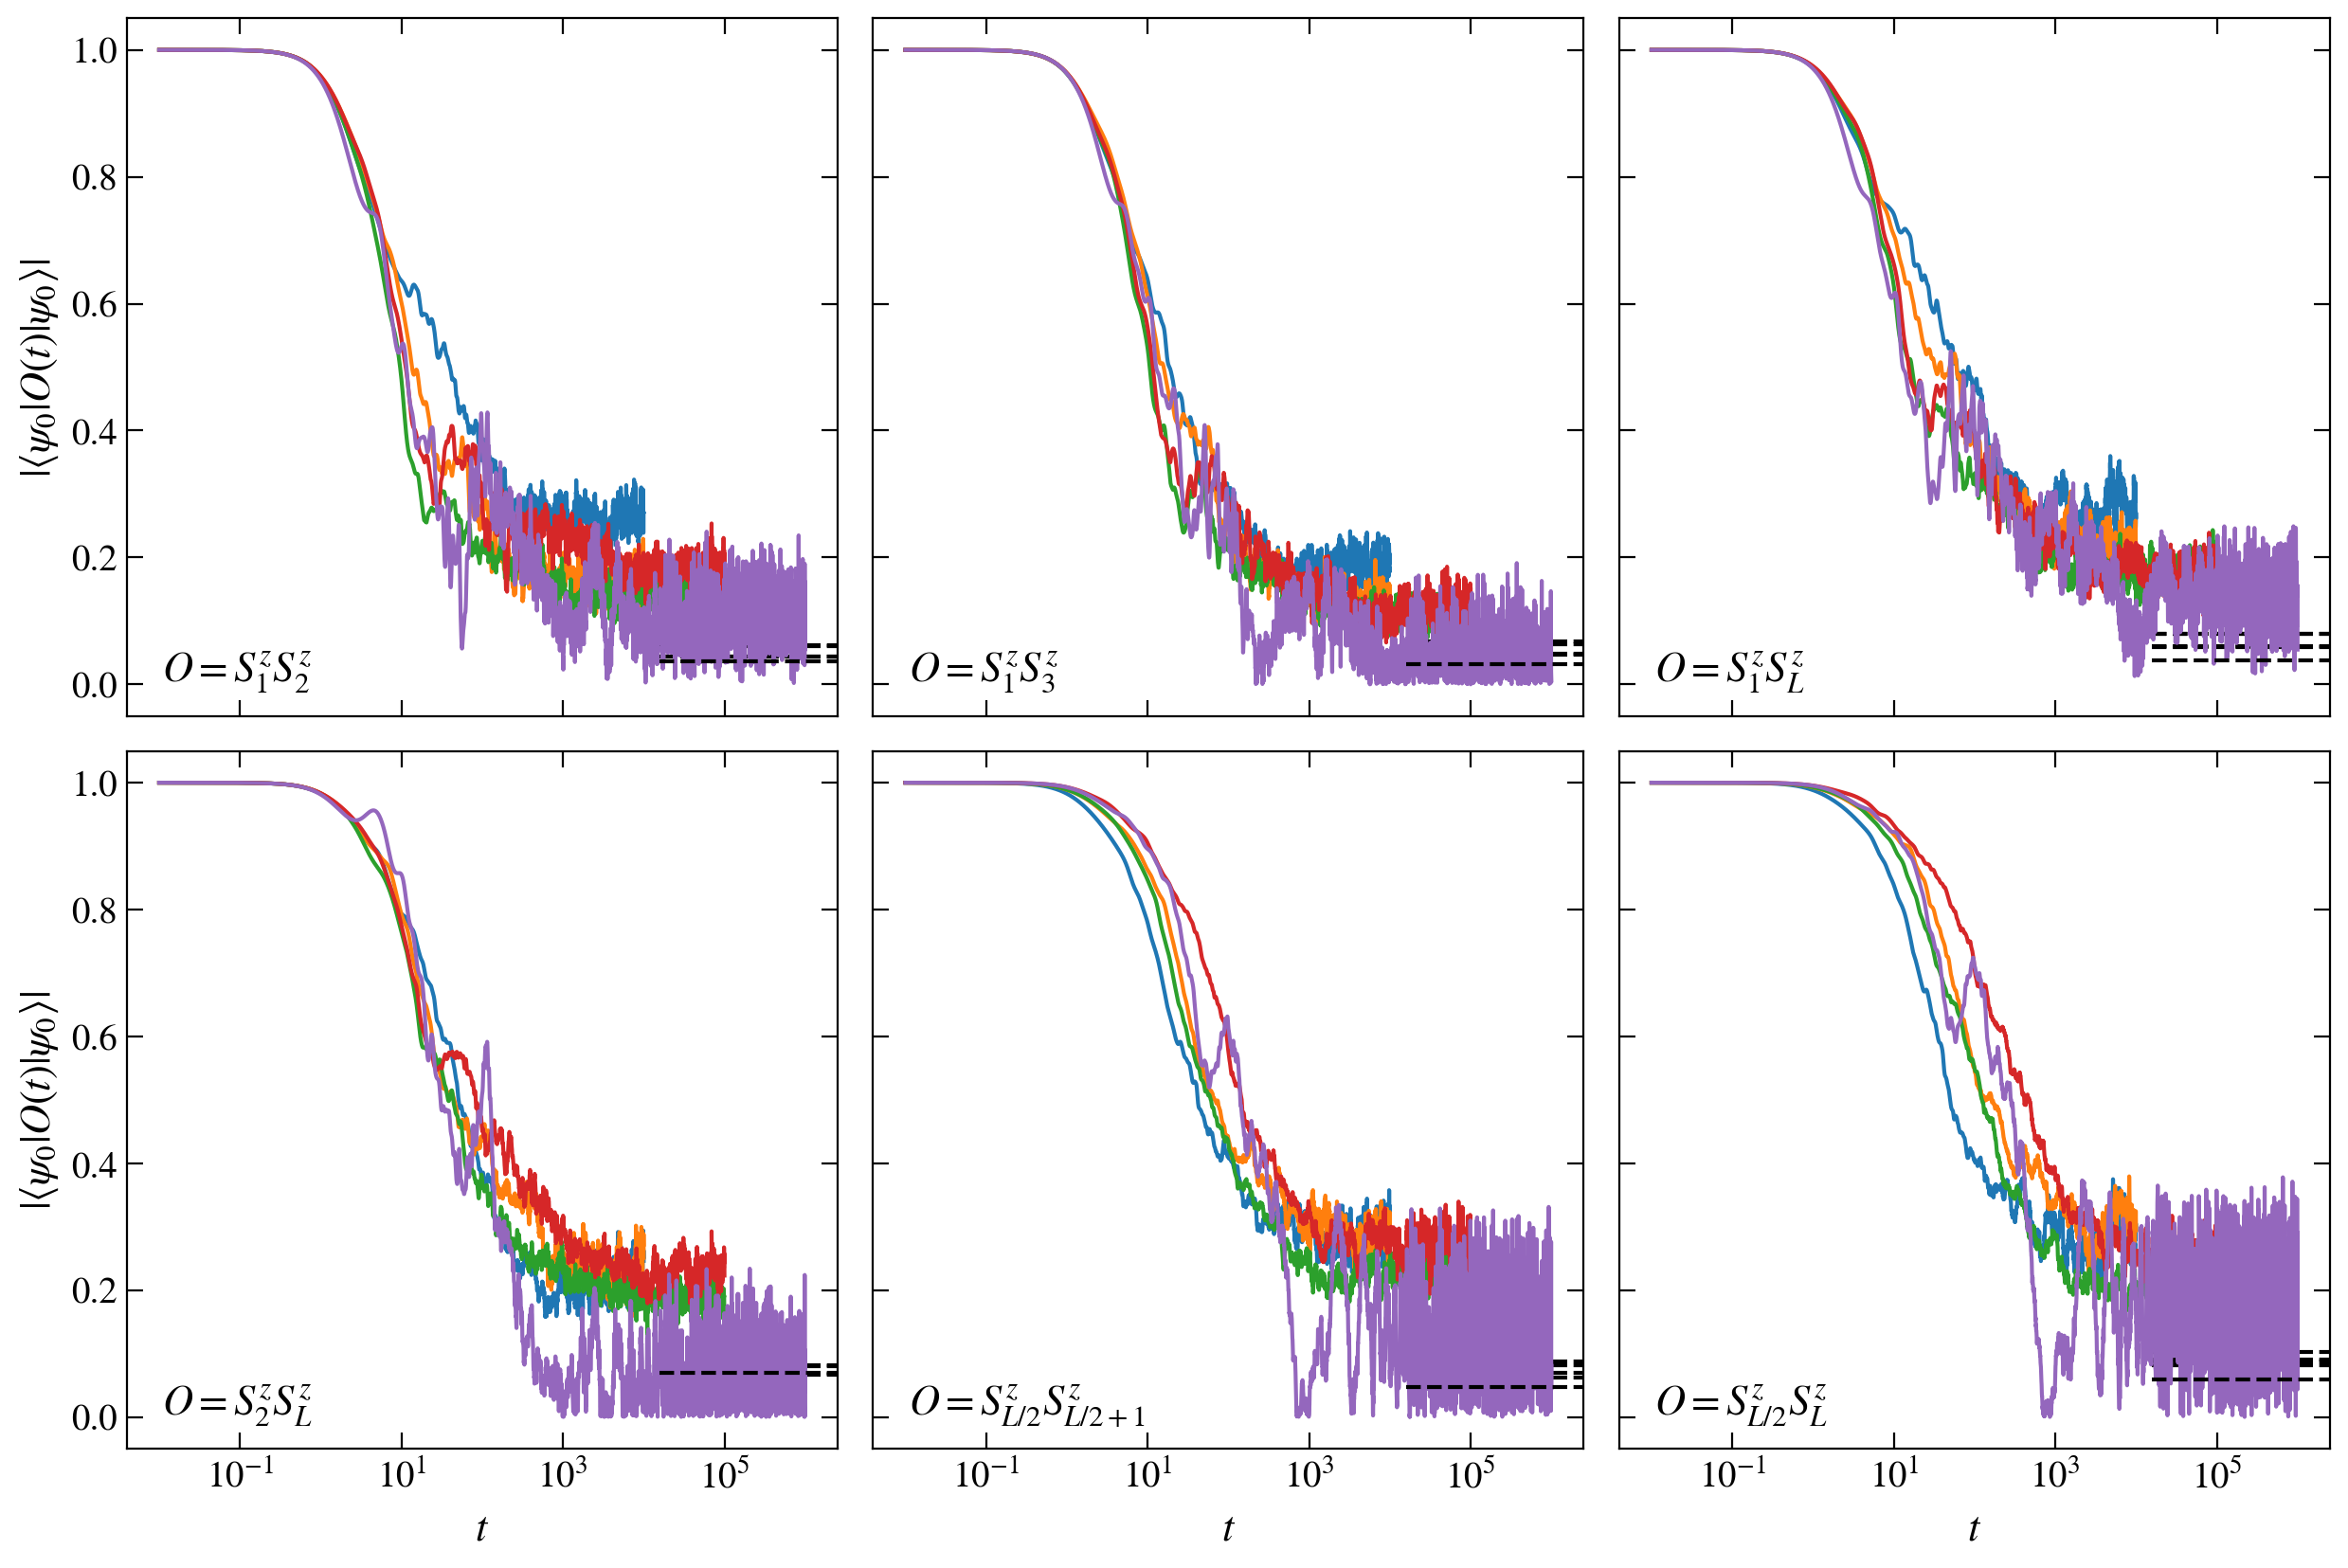

In [115]:


L_total=14

J=0.5

alfa=0.8
h=1.0
w=0.5
zeta=0.2
ini_ave=1

N=3
gamma=1.0
L = L_total - N

# std::vector<std::pair<int,int>> site_pairs = std::vector<std::pair<int,int>>(
			# {std::make_pair(this->grain_size, this->grain_size + 1), std::make_pair(this->grain_size, this->grain_size + 2),
			# std::make_pair(this->grain_size, this->L - 1), std::make_pair(this->grain_size + 1, this->L - 1),
			# std::make_pair(Lhalf, Lhalf + 1), std::make_pair(Lhalf, this->L - 1)}
			# );
alfas = np.arange(0.6, 1.0, 0.02)
sizes = np.arange(11, 16, 1)

spin_pairs = ['1:2', '1:3', '1:L', '2:L', 'L/2:L/2+1', 'L/2:L']
spin_pair = 'L'

def operator_name(spin_pair):
    ells = spin_pair.split(':')
    return r"$S^z_{%s}S^z_{%s}$"%(ells[0], ells[1])

quench_types = ['FM', 'AFM', 'spiral', 'random']
quench = 'AFM'


fig, axis = plt.subplots( nrows=2, ncols=3, figsize=(15,10), dpi = 200, sharey=True, sharex=True)
axis = axis.flatten()

for ii, spin_pair in enumerate(spin_pairs):
    
    colors_ls_cyc = itertools.cycle(colors_ls)
    markers = itertools.cycle(markers_ls)
    for L_total in sizes:
        col = next(colors_ls_cyc)
        L = L_total - N
        dim = 2**L_total
        omega_bins = np.logspace(np.log10(1/dim), 1, 100)
        # print(L_total, omega_bins)
        times_a = np.zeros((5000))
        autocorr = np.zeros((5000))
        LTA = 0
        counter = 0
        for real in range(10):
            name = '/Users/rafal.swietek/SCP/DOWNLOAD/realisation=%d/'%real + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', ini_ave=ini_ave)
            if exists(name):
                with h5py.File(name, "r") as file:
                    E = np.array(file.get('energies'))[0]
                    times = np.array(file.get('times'))
                    # print(om.shape)
                    if times.shape == (): continue
                    
                    times = times[0]
                    autocorr_r = 4 * np.abs( np.array(file.get('quench_' + quench))[ii] )
                    
                    autocorr += autocorr_r
                    counter += 1

                    # axis[ii].plot(times, autocorr_r, color='gray', lw=0.5)
                    LTA_r = 4 * np.array(file.get('LTA'))[0][ii]
                    # print(LTA_r)
                    LTA += LTA_r
                    # axis[ii].axhline(y=LTA_r, xmin=0.75, xmax=1, ls='--', c='k', lw=0.5)
                    times_a += times

            else:
                print(name)
        times_a /= counter
        autocorr /= counter
        LTA /= counter

        # print(times.shape, autocorr.shape)
        axis[ii].plot(times_a, autocorr, color=col, lw=1.5)
        axis[ii].axhline(y=LTA, xmin=0.75, xmax=1, ls='--', c='k')

    axis[ii].annotate(r"$O=$"+operator_name(spin_pair), fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    fig_help.set_plot_elements(axis[ii], xlabel=r"$t$" if ii > 2 else "", ylabel=r"$|\langle \psi_0|O(t)|\psi_0\rangle|$" if ii % 3 == 0 else "", font_size=14, set_legend=False, xscale='log', yscale='linear')

fig_help.set_legend(axis[0], loc = 'lower left', fontsize=12, anchor=(-0.02, 0.2))
fig.subplots_adjust(wspace = 0.05, hspace=0.05)